### Initial exploration of the dataset
Looking for ways to present the records in an optimal way

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read dataset
df = pd.read_csv('data/test_export.csv')

In [3]:
df.head()

,id,days,level,energy,material
0,0,0,0.0,0.000000,0.000000
1,0,1,15.0,19.315345,6.575597
2,0,2,16.0,164.275327,46.729636
3,0,3,23.0,448.717153,153.574486
4,0,4,25.0,685.119133,240.709294


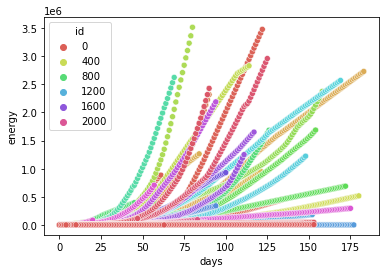

In [4]:
#Energy production per player_id
ax = sns.scatterplot(data=df, x='days', y='energy', hue='id',palette='hls')

In [5]:
stat1 = df.groupby(['days']).describe()


In [6]:
stat1.head()


id                                                               \
       count         mean         std  min    25%     50%     75%     max   
days                                                                        
0     1635.0  1093.931498  637.443778  0.0  543.0  1098.0  1641.5  2197.0   
1      767.0  1093.870926  647.142044  0.0  539.5  1094.0  1666.5  2197.0   
2      601.0  1098.585691  653.410218  0.0  510.0  1104.0  1674.0  2197.0   
3      523.0  1103.950287  653.963701  0.0  522.0  1122.0  1688.0  2197.0   
4      467.0  1104.486081  647.536223  0.0  522.0  1152.0  1671.0  2197.0   

       level             ...     energy               material             \
       count       mean  ...        75%           max    count       mean   
days                     ...                                                
0     1635.0   0.000000  ...   0.000000      0.000000   1635.0   0.000000   
1      492.0   6.443089  ...  18.504522   1348.148867    388.0   8.074607   
2      386.0   8.370466  ...  41.989841   4375.739594    351.0  29.093585   
3      332.0  10.180723  ...  65.963724   6844.391985    332.0  53.969348   
4      302.0  11.496689  ...  95.199466  12112.632236    306.0  93.703066   

                                                                        
             std       min       25%       50%        75%          max  
days                                                                    
0       0.000000  0.000000  0.000000  0.000000   0.000000     0.000000  
1      39.341785  0.004882  0.514000  1.266467   4.095308   555.946310  
2     166.331749  0.008082  1.003068  3.019200  11.888113  2718.297819  
3     282.678238  0.008082  1.605126  6.055864  23.446231  4511.022078  
4     470.450033  0.008082  2.388732  8.903589  39.297504  7050.446730  

[5 rows x 32 columns]

In [7]:
stat1['level']

,count,mean,std,min,25%,50%,75%,max
days,,,,,,,,
0,1635.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,492.0,6.443089,4.351980,1.0,3.0,5.0,9.0,30.0
2,386.0,8.370466,5.695298,1.0,4.0,7.0,12.0,33.0
3,332.0,10.180723,6.777686,1.0,4.0,9.0,14.0,36.0
4,302.0,11.496689,7.914723,1.0,5.0,10.0,16.0,50.0
...,...,...,...,...,...,...,...,...
179,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:label='028df830-d420-4470-857f-4b6cc065376d', xlabel='days', ylabel='energy'>

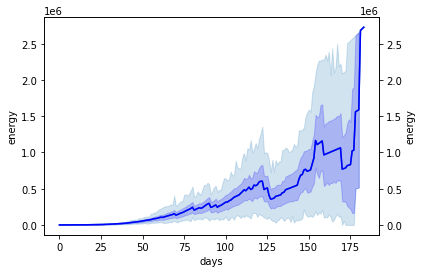

In [8]:
#try to display more than one confident interval
ax = sns.lineplot(data=df,x='days',y='energy',ci=100)

ax2 = plt.twinx()

sns.lineplot(data=df, x='days',y='energy',ci=75,color="b", ax=ax2)

[None]

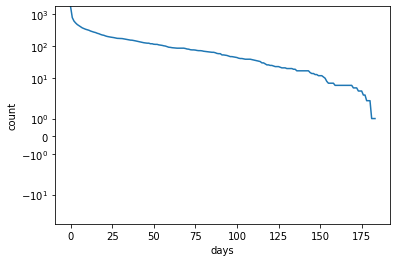

In [9]:
# No of players after some time, changed to log scale
ax = sns.lineplot(data=stat1['id']['count'])
ax.set(yscale="symlog")

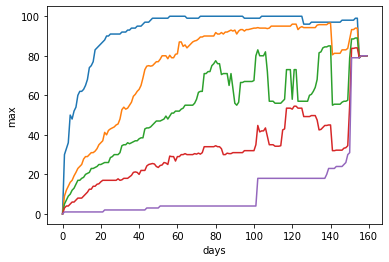

In [10]:
#only max - level is kind of smooth
ax = sns.lineplot(data=stat1['level']['max'])
ax = sns.lineplot(data=stat1['level']['75%'])
ax = sns.lineplot(data=stat1['level']['50%'])
ax = sns.lineplot(data=stat1['level']['25%'])
ax = sns.lineplot(data=stat1['level']['min'])

[(25.0, 180.0), (1000.0, 10000000.0)]

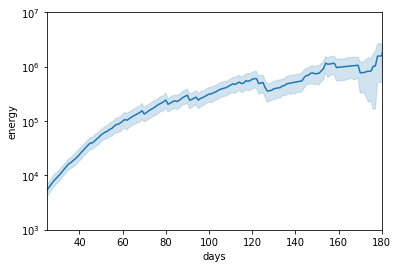

In [11]:
# Energy / day plot in log scale, still not smooth - not usable for comparison
ax = sns.lineplot(data=df,x='days',y='energy',ci=75)
ax.set(yscale="symlog")
ax.set(xlim=(25, 180),ylim=(1000, 10000000))


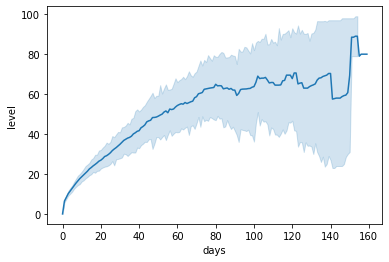

In [12]:
ax = sns.lineplot(data=df,x='days',y='level',ci=100)

In [107]:
df[df.level==100].describe()

,id,days,level,energy,material
count,77.000000,77.000000,77.0,7.700000e+01,77.000000
mean,1014.181818,93.727273,100.0,2.376213e+06,147661.801182
std,870.882065,19.898186,0.0,5.494698e+05,75099.458320
min,10.000000,56.000000,100.0,1.456358e+06,103852.422324
25%,115.000000,82.000000,100.0,1.921597e+06,106636.453927
50%,943.000000,89.000000,100.0,2.317386e+06,125377.876701
75%,1725.000000,114.000000,100.0,2.809708e+06,145891.515267
max,2131.000000,125.000000,100.0,3.514512e+06,367537.210283


In [13]:
#Finalists 
stat4=df[df.level == 100].groupby('id').min('days').sort_values('days')
stat4

,days,level,energy,material
id,,,,
943,56,100.0,1.456358e+06,123780.233863
473,72,100.0,2.446820e+06,329918.668293
1725,81,100.0,1.497741e+06,104686.290141
2131,83,100.0,1.715615e+06,122683.815539
115,84,100.0,1.765505e+06,126718.891422
10,104,100.0,2.277671e+06,103852.422324
2105,115,100.0,2.268873e+06,145891.515267


In [29]:
stat2=df[df.level>90].groupby(['id']).describe()
stat2.head()

days                                                    level             \
    count  mean        std   min    25%   50%     75%    max count       mean   
id                                                                              
0    17.0  46.0   5.049752  38.0  42.00  46.0   50.00   54.0  17.0  93.588235   
10   64.0  90.5  18.618987  59.0  74.75  90.5  106.25  122.0  64.0  97.484375   
115  37.0  72.0  10.824355  54.0  63.00  72.0   81.00   90.0  37.0  96.918919   
221  22.0  91.5   6.493587  81.0  86.25  91.5   96.75  102.0  22.0  93.181818   
225  41.0  63.0  11.979149  43.0  53.00  63.0   73.00   83.0  41.0  94.487805   

     ...        energy               material                              \
     ...           75%           max    count          mean           std   
id   ...                                                                    
0    ...  4.744808e+05  6.174603e+05     17.0  69904.326867  15363.117516   
10   ...  2.426939e+06  3.477373e+06     64.0  84939.095278  23926.299562   
115  ...  1.507375e+06  2.317253e+06     37.0  96194.561494  24455.344732   
221  ...  6.857206e+05  8.180813e+05     22.0  63516.158137   7774.669251   
225  ...  9.569739e+05  1.238753e+06     41.0  67469.871745  16509.358223   

                                                                             
              min           25%           50%            75%            max  
id                                                                           
0    45826.078341  57401.444913  70655.856134   81439.354714   95168.961195  
10   36202.882652  65753.422889  93295.653785  104997.833429  111413.771380  
115  54625.715185  75109.995330  96448.891679  119666.108458  128067.559709  
221  52294.913356  56665.299247  63280.699673   70198.480211   75623.865126  
225  38342.183561  53431.467675  68645.056172   82966.349456   90232.547409  

[5 rows x 32 columns]

### looking on the subset of players who reached Lv 90

In [14]:
id_selected=df[df.level>90]['id'].unique()
id_selected

array([   0,   10,  115,  221,  225,  254,  420,  473,  547,  549,  661,
        700,  799,  814,  943, 1102, 1122, 1513, 1631, 1641, 1725, 1842,
       2105, 2131], dtype=int64)

In [15]:
# new dataframe with a selection of id's
df_players_lv90=df[df.id.isin(id_selected)]
df_players_lv90.head()

,id,days,level,energy,material
0,0,0,0.0,0.000000,0.000000
1,0,1,15.0,19.315345,6.575597
2,0,2,16.0,164.275327,46.729636
3,0,3,23.0,448.717153,153.574486
4,0,4,25.0,685.119133,240.709294


In [16]:
stat3 = df_players_lv90.groupby(['days']).describe()

In [53]:
stat3.head()

id                                                         level  \
     count     mean         std  min    25%    50%     75%     max count   
days                                                                       
0     24.0  897.625  672.889668  0.0  378.5  749.5  1542.5  2131.0  24.0   
1     24.0  897.625  672.889668  0.0  378.5  749.5  1542.5  2131.0  24.0   
2     24.0  897.625  672.889668  0.0  378.5  749.5  1542.5  2131.0  24.0   
3     24.0  897.625  672.889668  0.0  378.5  749.5  1542.5  2131.0  24.0   
4     24.0  897.625  672.889668  0.0  378.5  749.5  1542.5  2131.0  24.0   

                 ...      energy              material              \
           mean  ...         75%          max    count        mean   
days             ...                                                 
0      0.000000  ...    0.000000     0.000000     24.0    0.000000   
1     12.166667  ...  152.299621  1348.148867     24.0   35.135973   
2     15.583333  ...  272.788551  2637.723075     24.0  106.889006   
3     18.666667  ...  441.090189  4120.757000     24.0  187.419029   
4     21.333333  ...  686.025646  6305.039513     24.0  331.688300   

                                                                           
             std       min        25%        50%         75%          max  
days                                                                       
0       0.000000  0.000000   0.000000   0.000000    0.000000     0.000000  
1     112.665624  0.004882   0.822029   3.200235   19.057002   555.946310  
2     265.136632  0.483743   4.967754  18.349061   54.023567  1249.245544  
3     409.727725  0.933800   9.032518  46.691242  172.695362  1930.565915  
4     710.094765  0.982989  22.075278  70.449008  317.691997  3280.442760  

[5 rows x 32 columns]

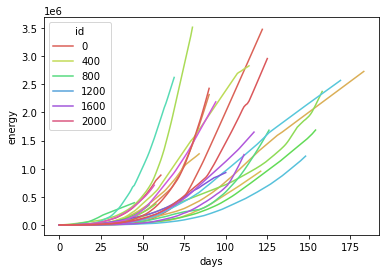

In [17]:
ax = sns.lineplot(data=df_players_lv90,x='days', y='energy', hue='id',palette='hls')

[None]

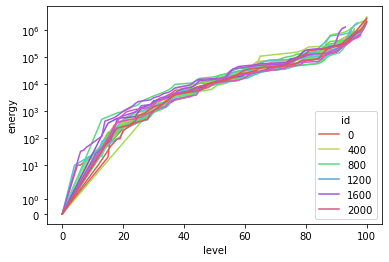

In [19]:
#plot changed to log
ax = sns.lineplot(data=df_players_lv90,x='level', y='energy', hue='id',palette='hls')
ax.set(yscale="symlog")

[None]

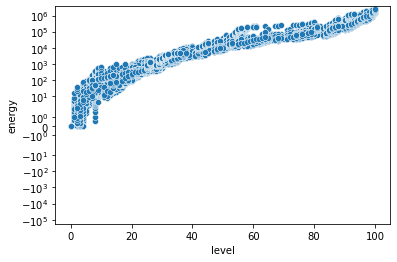

In [20]:
#same mess, different color
ax = sns.scatterplot(data=df,x='level', y='energy')
ax.set(yscale="symlog")

### maybe fitting a curve?

In [22]:
from scipy.optimize import curve_fit

In [23]:
level=df['level'].dropna
energy=df['energy'].dropna
new = df[['level', 'energy']].copy()
new


,level,energy
0,0.0,0.000000
1,15.0,19.315345
2,16.0,164.275327
3,23.0,448.717153
4,25.0,685.119133
...,...,...
18598,0.0,0.000000
18599,1.0,0.976839
18600,2.0,1.953678
18601,NaN,3.827326


In [24]:
#NAN must be removed
new_df = new.dropna()
new_df

,level,energy
0,0.0,0.000000
1,15.0,19.315345
2,16.0,164.275327
3,23.0,448.717153
4,25.0,685.119133
...,...,...
18591,0.0,0.000000
18597,0.0,0.000000
18598,0.0,0.000000
18599,1.0,0.976839


In [25]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [26]:
popt, pcov = curve_fit(func, new_df['level'], new_df['energy'],p0=[1,0,1])

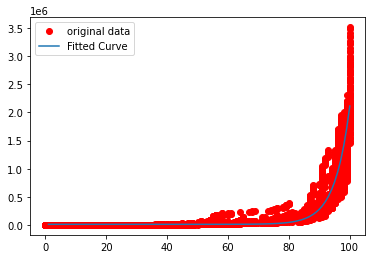

In [34]:
plt.plot(new_df['level'], new_df['energy'], 'ro', label="original data")
t = np.linspace(1, 100, 100)
plt.plot(t, func(t, *popt), label="Fitted Curve")
plt.legend(loc='upper left')
plt.show()

no further ideas at the moment ...